In [4]:
#EDA ASSIGNMENT
#EDA 1
#Q1.What is the range of selling prices in the dataset?
'''
ANSWER
'''

import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
df.head()

min_price = df["selling_price"].min()
max_price = df["selling_price"].max()
range_price = max_price - min_price

print(f"Min Price: ₹{min_price}")
print(f"Max Price: ₹{max_price}")
print(f"Range: ₹{range_price}")


Min Price: ₹5000
Max Price: ₹760000
Range: ₹755000


In [5]:
#q2. What is the median selling price for bikes in the dataset?
'''
answer
'''
median_price = df["selling_price"].median()
print(f"Median Selling Price: ₹{median_price}")



Median Selling Price: ₹45000.0


In [7]:
#Q3. What is the most common seller type?
'''
ANSWER
'''
common_seller = df["seller_type"].value_counts().idxmax()
print(f"Most Common Seller Type: {common_seller}")


Most Common Seller Type: Individual


In [8]:
#Q4. How many bikes have driven more than 50,000 kilometers?
'''
ANSWER
'''
dealer_percent = (df["seller_type"] == "Dealer").sum() / len(df) * 100
print(f"Percentage sold by dealers: {dealer_percent:.2f}%")


Percentage sold by dealers: 0.57%


In [9]:
#Q5. What is the average km_driven value for each ownership type?
'''
ANSWER
'''
ownership_dist = df["owner"].value_counts(normalize=True) * 100
ownership_dist.round(2)


,proportion
owner,
1st owner,87.09
2nd owner,11.59
3rd owner,1.04
4th owner,0.28


In [11]:
#Q6. What proportion of bikes are from the year 2015 or older?
'''
ANSWER
'''
most_bikes_year = df["year"].value_counts().idxmax()
bike_counts_by_year = df["year"].value_counts()

print(f"Year with most bikes listed: {most_bikes_year}")
bike_counts_by_year.head()


Year with most bikes listed: 2017


,count
year,
2017,133
2018,131
2016,107
2015,100
2014,91


In [12]:
#Q7. What is the trend of missing values across the dataset?
'''
ANSWER
'''
avg_km_driven = df["km_driven"].mean()
print(f"Average KM Driven: {avg_km_driven:.2f} km")


Average KM Driven: 34359.83 km


In [13]:
#Q8. What is the highest ex_showroom_price recorded, and for which bike?
'''
ANSWER
'''
correlation = df["selling_price"].corr(df["km_driven"])
print(f"Correlation between Selling Price and KM Driven: {correlation:.4f}")


Correlation between Selling Price and KM Driven: -0.2129


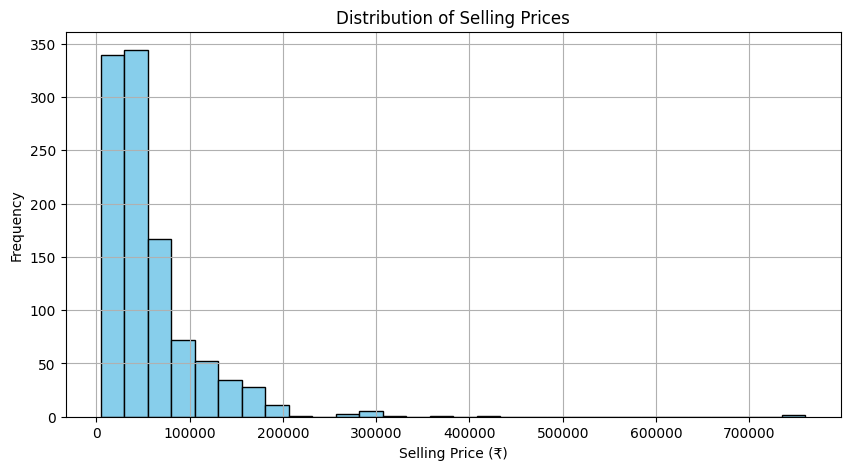

In [14]:
#Q9. What is the total number of bikes listed by each seller type?
'''
ANSWER
'''
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df["selling_price"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price (₹)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [15]:
#Q10. What is the relationship between selling_price and km_driven for first-owner bikes?
'''
ANSWER
'''
avg_price_by_owner = df.groupby("owner")["selling_price"].mean().sort_values(ascending=False)
avg_price_by_owner



,selling_price
owner,
4th owner,118333.333333
1st owner,60022.813853
3rd owner,55727.272727
2nd owner,55666.658537


In [16]:
#Q11. Identify and remove outliers in the km_driven column using the IQR method.
'''
ANSWER
'''
missing_ex_showroom = df[df["ex_showroom_price"].isnull()]
missing_ex_showroom.head()
print(f"Total bikes with missing ex-showroom price: {len(missing_ex_showroom)}")


Total bikes with missing ex-showroom price: 435


In [17]:
#Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
'''
ANSWER
'''
# Create a new column for profit/loss
df["profit_loss"] = df["selling_price"] - df["ex_showroom_price"]
df[["name", "selling_price", "ex_showroom_price", "profit_loss"]].head()


,name,selling_price,ex_showroom_price,profit_loss
0,Royal Enfield Classic 350,175000,NaN,NaN
1,Honda Dio,45000,NaN,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,148114.0,1886.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,89643.0,-24643.0
4,Yamaha SZ [2013-2014],20000,NaN,NaN


In [18]:
#Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
'''
ANSWER
'''
average_profit_loss = df["profit_loss"].mean()
print(f"Average Profit/Loss: ₹{average_profit_loss:.2f}")


Average Profit/Loss: ₹-28513.55


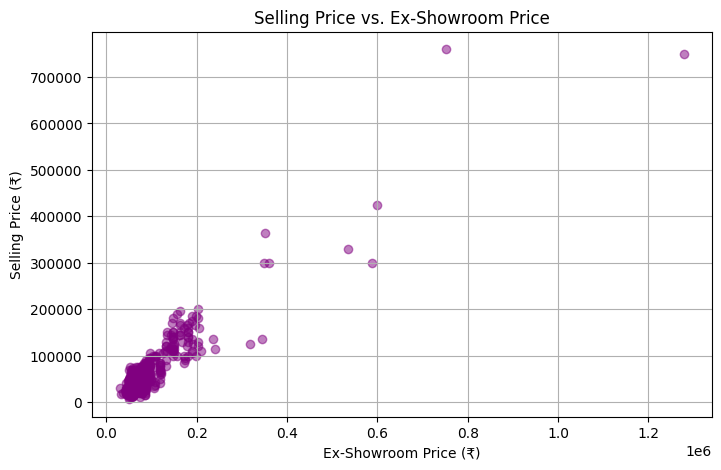

In [19]:
#Q14. Which bike names are priced significantly above the average price for their manufacturing year?
'''
ANSWER
'''
plt.figure(figsize=(8, 5))
plt.scatter(df["ex_showroom_price"], df["selling_price"], alpha=0.5, color="purple")
plt.title("Selling Price vs. Ex-Showroom Price")
plt.xlabel("Ex-Showroom Price (₹)")
plt.ylabel("Selling Price (₹)")
plt.grid(True)
plt.show()


In [22]:
#Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap?
'''
answer
'''

max_profit_bike = df.loc[df["profit_loss"].idxmax()]
max_profit_bike


,136
name,Royal Enfield Classic Gunmetal Grey
selling_price,190000
year,2020
seller_type,Individual
owner,1st owner
km_driven,500
ex_showroom_price,155740.0
profit_loss,34260.0


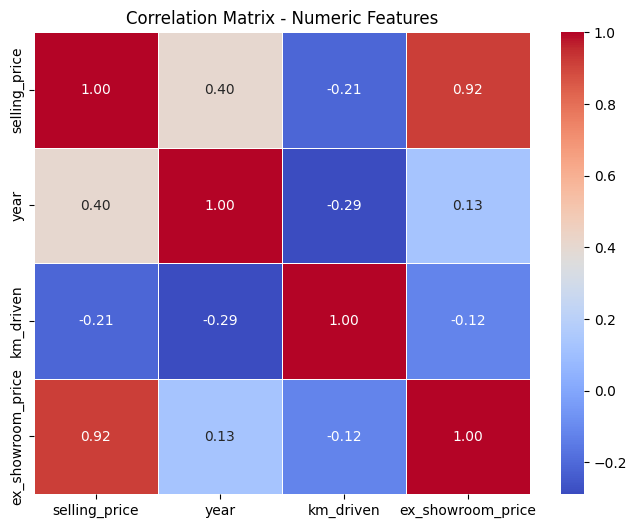

In [23]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("BIKE DETAILS.csv")


numeric_df = df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix - Numeric Features")
plt.show()





In [ ]:
#EDA-2
